# 1. Import and Install Dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture("DAYS.mp4")
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [7]:
len(results.left_hand_landmarks.landmark)

21

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_landmarks(frame, results)

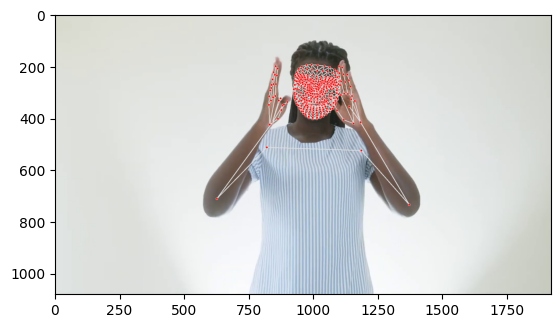

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [11]:
len(results.left_hand_landmarks.landmark)

21

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.52732211,  0.28565007, -0.37131509, ...,  0.43549746,
        0.25287619, -0.0362901 ])

In [17]:
468*3+33*4+21*3+21*3

1662

In [18]:
np.save('0', result_test)

In [19]:
np.load('0.npy')

array([ 0.52732211,  0.28565007, -0.37131509, ...,  0.43549746,
        0.25287619, -0.0362901 ])

# 4. Setup Folders for Collection

In [20]:
from moviepy.editor import VideoFileClip

In [21]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_DATA')

# Scan the data folder to collect unique action labels
actions = set()
video_lengths = {}  # Dictionary to store video lengths

for filename in os.listdir(DATA_PATH):
    if filename.endswith('.mp4'):
        action = filename.split('.')[0]  # Extract the action label from the filename
        actions.add(action)

        # Get the duration of the video in frames
        video_path = os.path.join(DATA_PATH, filename)
        clip = VideoFileClip(video_path)
        duration = int(clip.duration * clip.fps)  # Duration in frames
        video_lengths[action] = duration
        clip.close()

# Convert the set of unique action labels to a NumPy array
actions = np.array(list(actions))

# Calculate the maximum sequence length (maximum frames)
MAX_SEQUENCE_LENGTH = max(video_lengths.values())


# number of sequences to extract
no_sequences = 1

print("Actions Detected:")
print(actions)

print("\nVideo Lengths (in frames):")
for action, length in video_lengths.items():
    print(f"{action}: {length} frames")

Actions Detected:
['sign language' 'and' 'family' 'have' 'members' 'numbers' 'our' 'but'
 'topic' 'users' 'diferrent' 'ways' 'here' 'is' 'guardians' 'as follows'
 'start' 'follows' 'other' 'regions' 'parents' 'now' 'ugandan' 'hello'
 'children']

Video Lengths (in frames):
and: 13 frames
as follows: 49 frames
but: 11 frames
children: 49 frames
diferrent: 43 frames
family: 19 frames
follows: 32 frames
guardians: 50 frames
have: 23 frames
hello: 13 frames
here: 16 frames
is: 16 frames
members: 41 frames
now: 42 frames
numbers: 43 frames
other: 17 frames
our: 19 frames
parents: 48 frames
regions: 32 frames
sign language: 32 frames
start: 25 frames
topic: 41 frames
ugandan: 53 frames
users: 34 frames
ways: 24 frames


In [22]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [23]:
from moviepy.editor import VideoFileClip

In [24]:

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_DATA')


# Path to the folder containing video files
video_folder = 'MP_DATA'

# Get a list of all video file paths
video_paths = [os.path.join(video_folder, f) for f in os.listdir(video_folder) if f.endswith('.mp4')]

# Set mediapipe model
mp_holistic = mp.solutions.holistic

for video_path in video_paths:
    # Get the action label from the video file name
    action = os.path.basename(video_path).split('.')[0]

    # Initialize the video capture object
    cap = cv2.VideoCapture(video_path)

    # Check if the video capture was successful
    if not cap.isOpened():
        print(f"Error: Failed to open the video file {video_path}")
        continue

    # Get the video length (in frames) from the video_lengths dictionary
    sequence_length = video_lengths[action]

    # Set mediapipe model
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        # Create folder for action if it doesn't exist
        action_folder = os.path.join(DATA_PATH, action)
        if not os.path.exists(action_folder):
            os.makedirs(action_folder)

        # Get the next available sequence folder name
        sequence_id = 0
        sequence_folder = os.path.join(action_folder, str(sequence_id))
        while os.path.exists(sequence_folder):
            sequence_id += 1
            sequence_folder = os.path.join(action_folder, str(sequence_id))

        # Create the new sequence folder
        os.makedirs(sequence_folder)

        # Check if all NumPy files already exist in the sequence folder
        existing_files = [f for f in os.listdir(sequence_folder) if f.endswith('.npy')]
        if len(existing_files) == sequence_length:
            print(f"Extraction already done for {action}. Skipping...")
            continue

        # Loop through video length aka sequence length
        for frame_num in range(sequence_length):
            # Read feed
            ret, frame = cap.read()

            # Check if the frame is empty
            if not ret:
                print(f"Error: Failed to read frame from the video capture {video_path}")
                break

            # Make detections
            image, results = mediapipe_detection(frame, holistic)

            # Draw landmarks
            draw_styled_landmarks(image, results)

            # Apply wait logic
            if frame_num == 0:
                cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence_id), (15, 12),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                # Show to screen
                cv2.imshow('OpenCV Feed', image)
                cv2.waitKey(500)

            else:
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence_id), (15, 12),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                # Show to screen
                cv2.imshow('OpenCV Feed', image)

                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(sequence_folder, str(frame_num))
                np.save(npy_path, keypoints)

            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

    # Release video capture
    cap.release()

# Close OpenCV windows
cv2.destroyAllWindows()    

Error: Failed to read frame from the video capture MP_DATA\follows.mp4
Error: Failed to read frame from the video capture MP_DATA\have.mp4
Error: Failed to read frame from the video capture MP_DATA\here.mp4
Error: Failed to read frame from the video capture MP_DATA\is.mp4
Error: Failed to read frame from the video capture MP_DATA\parents.mp4
Error: Failed to read frame from the video capture MP_DATA\regions.mp4
Error: Failed to read frame from the video capture MP_DATA\sign language.mp4
Error: Failed to read frame from the video capture MP_DATA\start.mp4


In [27]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [26]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [32]:
import os
import numpy as np
import torch

DATA_PATH = os.path.join('MP_DATA')
TENSOR_PATH = os.path.join('TENSOR_DATA')  # Path to save tensor files

# Create the TENSOR_PATH folder if it doesn't exist
if not os.path.exists(TENSOR_PATH):
    os.makedirs(TENSOR_PATH)

# Iterate over the action folders
for entry in os.listdir(DATA_PATH):
    action_path = os.path.join(DATA_PATH, entry)
    
    # Check if the entry is a directory (folder)
    if os.path.isdir(action_path):
        action_folder = entry
        action_tensor_path = os.path.join(TENSOR_PATH, action_folder)  # Path to save tensors for the current action

        # Create the action_tensor_path folder if it doesn't exist
        if not os.path.exists(action_tensor_path):
            os.makedirs(action_tensor_path)

        # Iterate over the sequence folders within the action folder
        for sequence_folder in os.listdir(action_path):
            sequence_path = os.path.join(action_path, sequence_folder)

            # Initialize an empty list to store the tensors
            sequence_tensors = []

            # Iterate over the NumPy files within the sequence folder
            for numpy_file in os.listdir(sequence_path):
                if numpy_file.endswith('.npy'):
                    numpy_path = os.path.join(sequence_path, numpy_file)
                    keypoints = np.load(numpy_path)

                    # Convert the NumPy array to a PyTorch tensor
                    tensor = torch.from_numpy(keypoints)

                    # Append the tensor to the list
                    sequence_tensors.append(tensor)

            # Check if the sequence_tensors list is not empty
            if sequence_tensors:
                # Convert the list of tensors to a single tensor
                sequence_tensor = torch.stack(sequence_tensors)

                # Save the sequence tensor to a file
                tensor_filename = f"{action_folder}_{sequence_folder}.pt"
                tensor_filepath = os.path.join(action_tensor_path, tensor_filename)
                torch.save(sequence_tensor, tensor_filepath)

                print(f"Tensor saved to: {tensor_filepath}")
            else:
                print(f"No NumPy files found in {action_folder}/{sequence_folder}. Skipping...")
    else:
        print(f"Skipping non-directory entry: {entry}")

No NumPy files found in and/0. Skipping...
Tensor saved to: TENSOR_DATA\and\and_1.pt
Tensor saved to: TENSOR_DATA\and\and_10.pt
Tensor saved to: TENSOR_DATA\and\and_11.pt
Tensor saved to: TENSOR_DATA\and\and_12.pt
Tensor saved to: TENSOR_DATA\and\and_13.pt
Tensor saved to: TENSOR_DATA\and\and_14.pt
Tensor saved to: TENSOR_DATA\and\and_15.pt
Tensor saved to: TENSOR_DATA\and\and_16.pt
Tensor saved to: TENSOR_DATA\and\and_2.pt
Tensor saved to: TENSOR_DATA\and\and_3.pt
Tensor saved to: TENSOR_DATA\and\and_4.pt
Tensor saved to: TENSOR_DATA\and\and_5.pt
Tensor saved to: TENSOR_DATA\and\and_6.pt
Tensor saved to: TENSOR_DATA\and\and_7.pt
Tensor saved to: TENSOR_DATA\and\and_8.pt
Tensor saved to: TENSOR_DATA\and\and_9.pt
Skipping non-directory entry: and.mp4
No NumPy files found in as follows/0. Skipping...
Tensor saved to: TENSOR_DATA\as follows\as follows_1.pt
Tensor saved to: TENSOR_DATA\as follows\as follows_10.pt
Tensor saved to: TENSOR_DATA\as follows\as follows_11.pt
Tensor saved to: TEN

In [34]:
import os
import torch
import cv2
import numpy as np

TENSOR_PATH = 'TENSOR_DATA'

# Function to visualize a tensor as an image
def visualize_tensor(tensor, action_name):
    # Convert the tensor to a NumPy array
    tensor_np = tensor.numpy()

    # Reshape the tensor to match the expected image dimensions
    tensor_np = np.squeeze(tensor_np)
    tensor_np = tensor_np.transpose(1, 2, 0)

    # Convert the NumPy array to an OpenCV image
    image = cv2.normalize(tensor_np, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_32F)
    image = image.astype(np.uint8)

    # Display the image
    cv2.imshow(f'{action_name}_1.pt', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Iterate over the action folders
for action_folder in os.listdir(TENSOR_PATH):
    action_path = os.path.join(TENSOR_PATH, action_folder)

    # Check if the entry is a directory (folder)
    if os.path.isdir(action_path):
        # Load the {action}_1.pt tensor file
        tensor_filename = f'{action_folder}_1.pt'
        tensor_filepath = os.path.join(action_path, tensor_filename)

        if os.path.exists(tensor_filepath):
            # Load the tensor from the file
            tensor = torch.load(tensor_filepath)

            # Visualize the tensor
            print(f"Visualizing tensor for action: {action_folder}")
            visualize_tensor(tensor, action_folder)
        else:
            print(f"Tensor file '{tensor_filename}' not found in {action_folder}")
    else:
        print(f"Skipping non-directory entry: {action_folder}")

Visualizing tensor for action: and


ValueError: axes don't match array

In [35]:
import os
import torch
import cv2
import numpy as np

TENSOR_PATH = 'TENSOR_DATA'

# Function to visualize a tensor as an image
def visualize_tensor(tensor, action_name):
    # Convert the tensor to a NumPy array
    tensor_np = tensor.numpy()

    # Check the tensor's dimensions
    tensor_dims = tensor_np.ndim

    if tensor_dims == 3:
        # Tensor shape: (height, width, channels)
        image = tensor_np
    elif tensor_dims == 4:
        # Tensor shape: (batch_size, channels, height, width)
        image = tensor_np.transpose(0, 2, 3, 1)
    else:
        print(f"Unsupported tensor dimensions: {tensor_dims}")
        return

    # Normalize the image
    image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_32F)
    image = image.astype(np.uint8)

    # Display the image
    cv2.imshow(f'{action_name}_1.pt', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Iterate over the action folders
for action_folder in os.listdir(TENSOR_PATH):
    action_path = os.path.join(TENSOR_PATH, action_folder)

    # Check if the entry is a directory (folder)
    if os.path.isdir(action_path):
        # Load the {action}_1.pt tensor file
        tensor_filename = f'{action_folder}_1.pt'
        tensor_filepath = os.path.join(action_path, tensor_filename)

        if os.path.exists(tensor_filepath):
            # Load the tensor from the file
            tensor = torch.load(tensor_filepath)

            # Visualize the tensor
            print(f"Visualizing tensor for action: {action_folder}")
            visualize_tensor(tensor, action_folder)
        else:
            print(f"Tensor file '{tensor_filename}' not found in {action_folder}")
    else:
        print(f"Skipping non-directory entry: {action_folder}")

Visualizing tensor for action: and
Unsupported tensor dimensions: 2
Visualizing tensor for action: as follows
Unsupported tensor dimensions: 2
Visualizing tensor for action: but
Unsupported tensor dimensions: 2
Visualizing tensor for action: children
Unsupported tensor dimensions: 2
Visualizing tensor for action: diferrent
Unsupported tensor dimensions: 2
Visualizing tensor for action: family
Unsupported tensor dimensions: 2
Visualizing tensor for action: follows
Unsupported tensor dimensions: 2
Visualizing tensor for action: guardians
Unsupported tensor dimensions: 2
Visualizing tensor for action: have
Unsupported tensor dimensions: 2
Visualizing tensor for action: hello
Unsupported tensor dimensions: 2
Visualizing tensor for action: here
Unsupported tensor dimensions: 2
Visualizing tensor for action: is
Unsupported tensor dimensions: 2
Visualizing tensor for action: members
Unsupported tensor dimensions: 2
Visualizing tensor for action: now
Unsupported tensor dimensions: 2
Visualizin

In [32]:
label_map = {label:num for num, label in enumerate(actions)}

In [33]:
label_map

{'have': 0,
 'children': 1,
 'start': 2,
 'our': 3,
 'here': 4,
 'follows': 5,
 'guardians': 6,
 'family': 7,
 'members': 8,
 'ugandan': 9,
 'parents': 10,
 'as follows': 11,
 'regions': 12,
 'ways': 13,
 'other': 14,
 'sign language': 15,
 'topic': 16,
 'and': 17,
 'hello': 18,
 'is': 19,
 'now': 20,
 'but': 21,
 'numbers': 22,
 'diferrent': 23,
 'users': 24}

In [34]:
import os
import numpy as np

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_DATA')

# Actions (labels) in the dataset
potential_actions = os.listdir(DATA_PATH)
actions = [action for action in potential_actions if os.path.isdir(os.path.join(DATA_PATH, action))]

# Dictionary to map action names to label indices
label_map = {action: idx for idx, action in enumerate(actions)}

sequences, labels = [], []

for action in actions:
    action_folder = os.path.join(DATA_PATH, action)
    sequence_folders = [os.path.join(action_folder, f) for f in os.listdir(action_folder) if os.path.isdir(os.path.join(action_folder, f))]
    sequence_folders = sorted(sequence_folders)

    for sequence_folder in sequence_folders:
        sequence = []
        frame_files = sorted([f for f in os.listdir(sequence_folder) if f.endswith('.npy') and not f.startswith('._')])
        sequence_length = len(frame_files)

        for frame_num in range(sequence_length):
            npy_path = os.path.join(sequence_folder, frame_files[frame_num])
            try:
                res = np.load(npy_path)
                sequence.append(res)
            except EOFError:
                print(f"Warning: Skipping empty or corrupted file: {npy_path}")
                continue

        sequences.append(sequence)
        labels.append(label_map[action])

In [36]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences

# Get the length of the longest sequence
max_sequence_length = max(len(seq) for seq in sequences)

# Pad the sequences
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Convert the padded sequences to a NumPy array
sequences_array = np.array(padded_sequences)

In [37]:
np.array(labels).shape

(350,)

In [38]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences

# Get the length of the longest sequence
max_sequence_length = max(len(seq) for seq in sequences)

# Pad the sequences
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Convert the padded sequences to a NumPy array
X = np.array(padded_sequences)

In [39]:
X.shape

(350, 52, 1662)

In [40]:
y = to_categorical(labels).astype(int)

In [41]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [43]:
y_test.shape

(18, 25)

# 7. Build and Train LSTM Neural Network

In [44]:

from tensorflow.keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, RepeatVector

In [45]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [57]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking

model = Sequential()

# Add Masking layer to handle variable sequence lengths
model.add(Masking(mask_value=0.0, input_shape=(None, 1662)))  # Assuming 1662 is the feature dimension

# Increase the number of LSTM units and add dropout regularization
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))

# Add an additional LSTM layer with more units and dropout
model.add(LSTM(256, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))

# Keep the existing LSTM layer
model.add(LSTM(64, return_sequences=False, activation='relu'))

# Increase the number of units in the Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  # Add dropout regularization
model.add(Dense(64, activation='relu'))

# Output layer with the number of classes
model.add(Dense(len(actions), activation='softmax'))


In [58]:
res = [.7, 0.2, 0.1]

In [59]:
actions[np.argmax(res)]

'and'

In [60]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [61]:
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])

Epoch 1/100


11/11 [==============================] - 12s 234ms/step - loss: 3.2187 - categorical_accuracy: 0.0211
Epoch 2/100
11/11 [==============================] - 3s 237ms/step - loss: 3.2330 - categorical_accuracy: 0.0361
Epoch 3/100
11/11 [==============================] - 3s 238ms/step - loss: 3.2074 - categorical_accuracy: 0.0753
Epoch 4/100
11/11 [==============================] - 3s 237ms/step - loss: 3.1625 - categorical_accuracy: 0.0392
Epoch 5/100
11/11 [==============================] - 3s 236ms/step - loss: 3.0771 - categorical_accuracy: 0.0693
Epoch 6/100
11/11 [==============================] - 3s 235ms/step - loss: 2.9867 - categorical_accuracy: 0.1145
Epoch 7/100
11/11 [==============================] - 3s 237ms/step - loss: 2.9458 - categorical_accuracy: 0.0934
Epoch 8/100
11/11 [==============================] - 3s 238ms/step - loss: 2.8104 - categorical_accuracy: 0.1084
Epoch 9/100
11/11 [==============================] - 3s 239ms/step - loss: 2.7386 - categoric

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_1 (Masking)         (None, None, 1662)        0         
                                                                 
 lstm_3 (LSTM)               (None, None, 128)         916992    
                                                                 
 dropout_3 (Dropout)         (None, None, 128)         0         
                                                                 
 lstm_4 (LSTM)               (None, None, 256)         394240    
                                                                 
 dropout_4 (Dropout)         (None, None, 256)         0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 128)              

# 8. Make Predictions

In [63]:
res = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [64]:
actions[np.argmax(res[8])]

'parents'

In [65]:
actions[np.argmax(y_test[8])]

'parents'

# 9. Save Weights

In [66]:
model.save('ugsign.h5')

In [217]:
del model

In [67]:
model.load_weights('ugsign.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [68]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [69]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 116ms/step


In [70]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [71]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[17,  0],
        [ 0,  1]],

       [[17,  0],
        [ 0,  1]],

       [[17,  1],
        [ 0,  0]],

       [[17,  0],
        [ 0,  1]],

       [[17,  0],
        [ 1,  0]],

       [[17,  0],
        [ 0,  1]],

       [[16,  1],
        [ 0,  1]],

       [[17,  0],
        [ 1,  0]],

       [[17,  0],
        [ 0,  1]],

       [[17,  0],
        [ 0,  1]],

       [[17,  0],
        [ 0,  1]],

       [[17,  0],
        [ 0,  1]],

       [[17,  0],
        [ 0,  1]],

       [[17,  0],
        [ 0,  1]],

       [[16,  0],
        [ 0,  2]],

       [[16,  0],
        [ 0,  2]],

       [[17,  0],
        [ 0,  1]]], dtype=int64)

In [72]:
accuracy_score(ytrue, yhat)

0.8888888888888888

# 11. Test in Real Time

In [73]:
import pyttsx3

In [74]:

# Initialize the text-to-speech engine
audio = pyttsx3.init()

# 1. New detection variables
sequence = []
sentence = []
threshold = 0.4
cap = cv2.VideoCapture("test.mp4")

# Set mediapipe model
mp_holistic = mp.solutions.holistic
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)  # Print the results

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0, keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predicted_action = actions[np.argmax(res)]
            print(predicted_action)  # Print the predicted action
            audio.say(predicted_action)  # Speak the predicted action
            audio.runAndWait()

        # 3. Viz logic
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                    sentence = sentence[-5:]

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [77]:
import numpy as np
import cv2
import mediapipe as mp
import pyttsx3

# Initialize the text-to-speech engine
audio = pyttsx3.init()

# Initialize variables
sequence = []  # Initialize an empty sequence
sentence = []  # Initialize an empty sentence
threshold = 0.4
MIN_SEQUENCE_LENGTH_FOR_PREDICTION = 12  # Minimum sequence length required for prediction
MIN_THRESHOLD_PROBABILITY = 0.6  # Minimum probability required for prediction

cap = cv2.VideoCapture("test.mp4")

# Set mediapipe model
mp_holistic = mp.solutions.holistic

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
        
        if not ret:
            print("Failed to capture frame from camera. Check camera connection.")
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)  # Print the results
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)

        # Perform prediction when the sequence length is sufficient for a word
        if len(sequence) >= MIN_SEQUENCE_LENGTH_FOR_PREDICTION:
            # Convert sequence to numpy array
            sequence_array = np.expand_dims(sequence, axis=0)

            # Perform prediction
            res = model.predict(sequence_array)[0]

            # Get the predicted action
            max_prob_index = np.argmax(res)
            predicted_action = actions[max_prob_index]
            predicted_prob = res[max_prob_index]
            
            print(predicted_action, predicted_prob)  # Print the predicted action and probability
            
            # Check if prediction probability exceeds the threshold
            if predicted_prob >= MIN_THRESHOLD_PROBABILITY:
                # Speak the predicted action
                audio.say(predicted_action)
                audio.runAndWait()

                # Clear the sequence after prediction
                sequence = []

                # Update sentence
                if len(sentence) > 0:
                    if predicted_action != sentence[-1]:
                        sentence.append(predicted_action)
                else:
                    sentence.append(predicted_action)

                if len(sentence) > 5:
                    sentence = sentence[-5:]

        # Viz logic
        if len(sentence) > 0:
            cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ' '.join(sentence), (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2,
                        cv2.LINE_AA)

        # Show the frame
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release the video capture
cap.release()

# Close all OpenCV windows
cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 1s 883ms/step
but 0.08010009
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
but 0.08010009
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
but 0.08010009


KeyboardInterrupt: 

In [ ]:
cap.release()
cv2.destroyAllWindows()